
# Sphere Point Cloud Generation and Visualization

The following code generates a sphere point cloud, saves it as a binary PLY file, and visualizes it using a 3D scatter plot.


In [23]:
import numpy as np
import struct

In [24]:
# Test numpy function meshgrid
theta = np.array([0, 1, 2])
phi = np.array([7, 8])
theta_grid, phi_grid = np.meshgrid(theta, phi)

print(theta_grid)
# Output:
# [[0 1 2]
#  [0 1 2]]

print(phi_grid)
# Output:
# [[7 7 7]
#  [8 8 8]]


[[0 1 2]
 [0 1 2]]
[[7 7 7]
 [8 8 8]]


In [25]:
# Test numpy function ravel
array = np.array([[1, 2, 3], [4, 5, 6]])
flat_array = np.ravel(array)

print(flat_array)
# Output:
# [1 2 3 4 5 6]


[1 2 3 4 5 6]


In [26]:
# Test numpy function vstack
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
z = np.array([7, 8, 9])
stacked = np.vstack((x, y, z))

print(stacked)
# Output:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [27]:
# Test struct function pack
packed_data = struct.pack('i', 42)  # 'i' stands for Integer (4 bytes)

print(packed_data)
# Output: b'*\x00\x00\x00'


b'*\x00\x00\x00'


In [28]:
data = b'*\x00\x00\x00'
unpacked_data = struct.unpack('<i', data)  # Little Endian Integer

print(unpacked_data)
# Output: (42,)


(42,)


In [29]:
def generate_ply_sphere(filename, radius=1, num_theta=50, num_phi=25):
    # Generate the sphere point cloud with evenly spaced Theta and Phi values
    theta = np.linspace(0, 2 * np.pi, num_theta)
    phi = np.linspace(0, np.pi, num_phi)

    # Create a meshgrid of Theta and Phi (2D arrays)
    theta, phi = np.meshgrid(theta, phi)

    # Calculate the x, y, z coordinates of the sphere using vectorized computation
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)

    # Flatten the arrays for export
    points = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

    num_points = points.shape[0]

    # Write the binary PLY header
    header = f"""ply
format binary_little_endian 1.0
element vertex {num_points}
property float x
property float y
property float z
end_header
"""
    
    # Write the points to a binary PLY file
    with open(filename, 'wb') as f:
        f.write(header.encode('utf-8'))
        for point in points:
            f.write(struct.pack('fff', *point))


In [30]:
# Save the sphere as PLY file
generate_ply_sphere("sphere.ply")


In [31]:
import matplotlib.pyplot as plt


In [32]:
def plot_ply(filename):
    points = []

    # Read PLY file (binary)
    with open(filename, 'rb') as f:
        # Skip header
        while b'end_header' not in f.readline():
            pass

        # Read 3D points
        while True:
            bytes = f.read(12)  # 3 * 4 Bytes (float)
            if len(bytes) == 12:
                points.append(struct.unpack('fff', bytes))
            else:
                break

    points = np.array(points)
    
    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='b')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


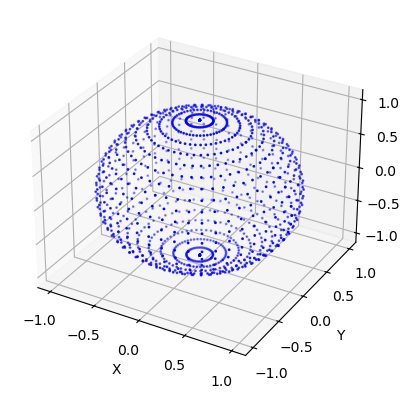

In [33]:
# Plot the sphere point cloud
plot_ply("sphere.ply")


In [34]:
import numpy as np
import struct

def generate_ply_circle(filename, radius=1, num_points=50, z=2.5):
    # Generate evenly spaced angles for the full circle
    angles = np.linspace(0, 2 * np.pi, num_points)  # 0 to 360 degrees

    # Calculate x and y coordinates of the circle using the angles
    x = radius * np.cos(angles) + radius  # Shift x by radius to ensure x > 0
    y = radius * np.sin(angles) + radius  # Shift y by radius to ensure y > 0

    # Initialize z-coordinates with the given z value
    z_coords = np.full(num_points, z)

    # Combine x, y, z into a single array of points
    points = np.vstack((x, y, z_coords)).T

    num_points = points.shape[0]

    # Write the binary PLY header
    header = f"""ply
format binary_little_endian 1.0
element vertex {num_points}
property float x
property float y
property float z
end_header
"""

    # Write the points to a binary PLY file
    with open(filename, 'wb') as f:
        f.write(header.encode('utf-8'))
        for point in points:
            f.write(struct.pack('fff', *point))


In [35]:
generate_ply_circle("circle.ply")


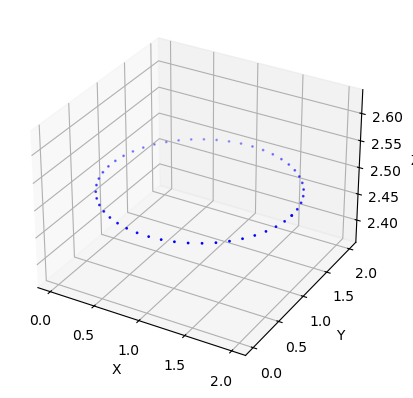

In [36]:
plot_ply("circle.ply")

# Transformation of 3D Point Cloud into 2D Amplitude Fields

The following code transforms the PLY file data into a 2D field (x and y coordinates) with a ground plane distance (z coordinate). It normalizes and scales the received data and writes it into an array. The amplitude fields are then visualized.

In [37]:
def transform_ply_data(filename):
    points = []

    # Read PLY file (binary)
    with open(filename, 'rb') as f:
        # Skip header
        while b'end_header' not in f.readline():
            pass

        # Read 3D points
        while True:
            bytes = f.read(12)  # 3 * 4 Bytes (float)
            if len(bytes) == 12:
                points.append(struct.unpack('fff', bytes))
            else:
                break
            
    points = np.array(points)
    
    print(points)
    

In [38]:
points = []

# Read PLY file (binary)
with open("circle.ply", 'rb') as f:
    # Skip header
    while b'end_header' not in f.readline():
        pass

    # Read 3D points
    while True:
        bytes = f.read(12)  # 3 * 4 Bytes (float)
        if len(bytes) == 12:
            points.append(struct.unpack('fff', bytes))
        else:
            break
            
points = np.array(points)


In [39]:
print(points)

[[2.00000000e+00 1.00000000e+00 2.50000000e+00]
 [1.99179006e+00 1.12787712e+00 2.50000000e+00]
 [1.96729481e+00 1.25365460e+00 2.50000000e+00]
 [1.92691672e+00 1.37526703e+00 2.50000000e+00]
 [1.87131870e+00 1.49071753e+00 2.50000000e+00]
 [1.80141366e+00 1.59811056e+00 2.50000000e+00]
 [1.71834934e+00 1.69568253e+00 2.50000000e+00]
 [1.62348986e+00 1.78183150e+00 2.50000000e+00]
 [1.51839256e+00 1.85514271e+00 2.50000000e+00]
 [1.40478337e+00 1.91441262e+00 2.50000000e+00]
 [1.28452754e+00 1.95866787e+00 2.50000000e+00]
 [1.15959990e+00 1.98718178e+00 2.50000000e+00]
 [1.03205156e+00 1.99948621e+00 2.50000000e+00]
 [9.03976977e-01 1.99537909e+00 2.50000000e+00]
 [7.77479053e-01 1.97492790e+00 2.50000000e+00]
 [6.54634953e-01 1.93846846e+00 2.50000000e+00]
 [5.37461698e-01 1.88659930e+00 2.50000000e+00]
 [4.27883327e-01 1.82017231e+00 2.50000000e+00]
 [3.27699095e-01 1.74027801e+00 2.50000000e+00]
 [2.38554046e-01 1.64822841e+00 2.50000000e+00]
 [1.61911890e-01 1.54553485e+00 2.500000

In [75]:
grid_size = 16  # max grid size
max_dist = 0.25  # max distance from ground plane (in meters)

# Get the minimum and maximum values of the x, y and z coordinates
min_vals = np.min(points, axis=0)
max_vals = np.max(points, axis=0)

# Normalize the x and y coordinates to [0, grid_size-1] and convert to integers
coordinates = (points[:, :2] - min_vals[:2]) / (max_vals[:2] - min_vals[:2])  # Normalize to [0, 1]
coordinates = (coordinates * (grid_size - 1)).astype(int)  # Scale to [0, grid_size-1]

# Normalize the z coordinates to [0, max_dist]
distances = points[:, 2] / np.max(points[:, 2]) * max_dist

# Combine the integer x and y with the z values
normalized_coords_distances = np.hstack((coordinates, distances.reshape(-1, 1)))


In [76]:
print(normalized_coords_distances)


[[15.    7.    0.25]
 [14.    8.    0.25]
 [14.    9.    0.25]
 [14.   10.    0.25]
 [14.   11.    0.25]
 [13.   11.    0.25]
 [12.   12.    0.25]
 [12.   13.    0.25]
 [11.   13.    0.25]
 [10.   14.    0.25]
 [ 9.   14.    0.25]
 [ 8.   14.    0.25]
 [ 7.   15.    0.25]
 [ 6.   14.    0.25]
 [ 5.   14.    0.25]
 [ 4.   14.    0.25]
 [ 4.   14.    0.25]
 [ 3.   13.    0.25]
 [ 2.   13.    0.25]
 [ 1.   12.    0.25]
 [ 1.   11.    0.25]
 [ 0.   10.    0.25]
 [ 0.    9.    0.25]
 [ 0.    8.    0.25]
 [ 0.    7.    0.25]
 [ 0.    7.    0.25]
 [ 0.    6.    0.25]
 [ 0.    5.    0.25]
 [ 0.    4.    0.25]
 [ 1.    3.    0.25]
 [ 1.    2.    0.25]
 [ 2.    1.    0.25]
 [ 3.    1.    0.25]
 [ 4.    0.    0.25]
 [ 4.    0.    0.25]
 [ 5.    0.    0.25]
 [ 6.    0.    0.25]
 [ 7.    0.    0.25]
 [ 8.    0.    0.25]
 [ 9.    0.    0.25]
 [10.    0.    0.25]
 [11.    1.    0.25]
 [12.    1.    0.25]
 [12.    2.    0.25]
 [13.    3.    0.25]
 [14.    3.    0.25]
 [14.    4.    0.25]
 [14.    5.  

In [131]:
# Number of matrices to create
num_fields = coordinates.shape[0]

# Initialize a 3D array to hold all the fields (num_fields, grid_size, grid_size)
fields = np.zeros((num_fields, grid_size, grid_size))

# For each coordinate pair, set the corresponding position to 1 in each slice
for i, (x, y) in enumerate(coordinates):
    fields[i, x, y] = 1


In [132]:
fields.shape

(50, 16, 16)

In [133]:
print(fields[0])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [134]:
distances.shape


(50,)

In [135]:
def plot_fields(fields):
    num_fields = fields.shape[0]  # Number of fields to plot
    
    # Loop over each matrix and create a plot
    for i in range(num_fields):
        plt.figure()
        plt.imshow(fields[i], cmap='gray', interpolation='nearest')
        plt.title(f'Field {i+1}')
        plt.colorbar(label='Value')
        plt.show()
        

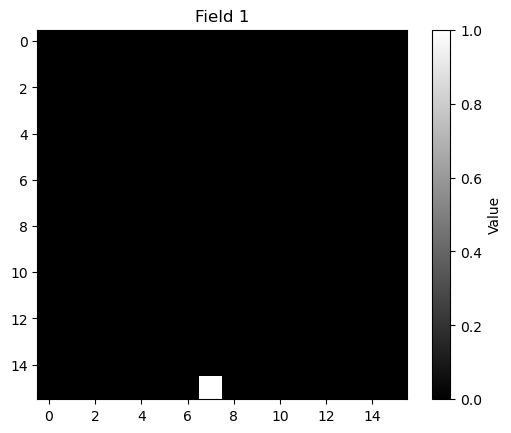

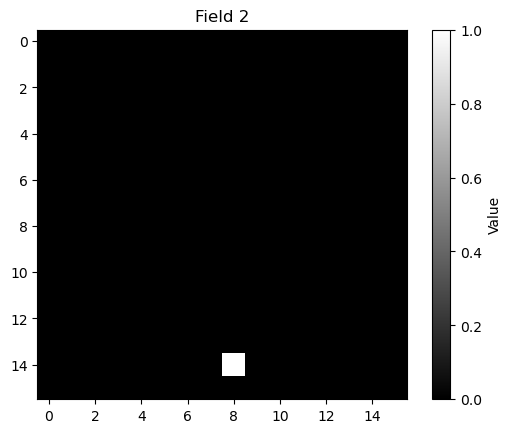

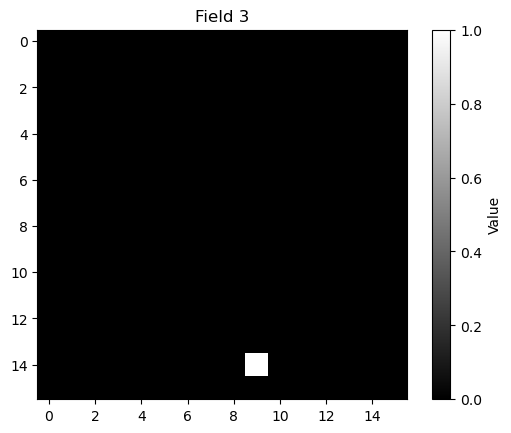

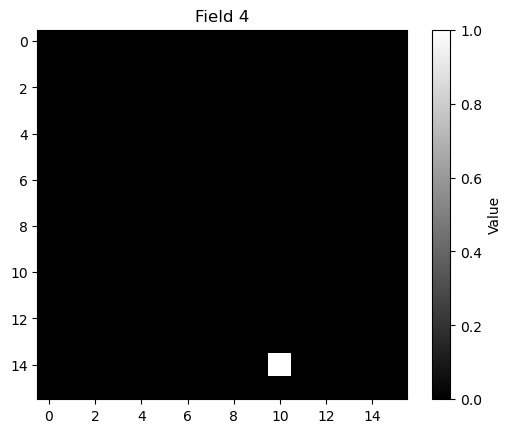

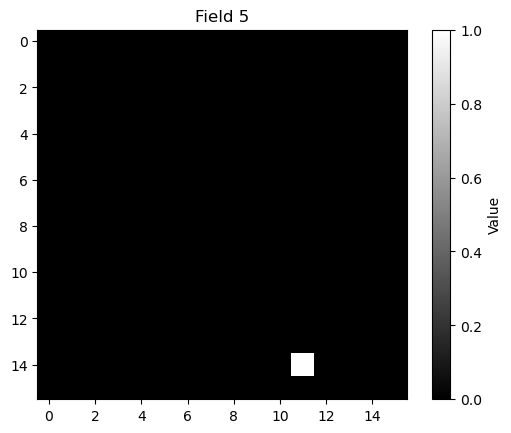

In [136]:
plot_fields(fields[:5])


# MATLAB Script Execution for Target Amplitude Calculation

The following code runs a MATLAB script to compute emission amplitudes and phases for the given amplitude fields and distances. The call to the MATLAB script is done by a subprocess call.

In [137]:
import scipy.io
import subprocess
import os


In [138]:
# Save the fields array to a .mat file
scipy.io.savemat('fields.mat', {'fields': fields})

# Save the distances array to a .mat file
scipy.io.savemat('distances.mat', {'distances': distances})

In [149]:
matlab_path = 'C:/Program Files/MATLAB/R2024b/bin/matlab.exe'

iterations = 50
board_size = 0.16
emitter_size = 0.01
amp_res = 0
phase_res = 32
emitter_freq = 40000
speed_of_sound = 343


In [157]:
# Create MATLAB script
matlab_script = f"""
% Load the data
load('fields.mat');
load('distances.mat');

% Initialize empty arrays for concatenation
amps = [];
phases = [];
amp_slices = [];

% Loop over the number of field entries
for i = 1:size(fields, 1)
    % Reshape fields from from 1xNxN to NxN
    field = squeeze(fields(i, :, :));
    
    % Call the function for each field and distance pair
    [temp_amps, temp_phases, temp_amp_slice] = calcEmissionForTargetAmpSlice(field, distances(i), {iterations}, {board_size}, {emitter_freq}, {speed_of_sound}, {emitter_size}, {amp_res}, {phase_res});
    
    % Concatenate the results along the first dimension (rows)
    amps = [amps; temp_amps];
    phases = [phases; temp_phases];
    amp_slices = [amp_slices; temp_amp_slice];
end

% Save the concatenated results
save('results.mat', 'amps', 'phases', 'amp_slices');

"""


In [158]:
# Save temporary MATLAB script
temp_script_path = os.path.join(os.getcwd(), 'temp_script.m').replace('\\', '/')
with open(temp_script_path, 'w') as f:
    f.write(matlab_script)
    

In [159]:
subprocess.run([matlab_path, '-batch', f"run('{temp_script_path}')"])


CompletedProcess(args=['C:/Program Files/MATLAB/R2024b/bin/matlab.exe', '-batch', "run('c:/Users/leona/OneDrive - student.kit.edu/Dokumente/Git/UltrasonicHapticsBoard/temp_script.m')"], returncode=0)

In [160]:
# Load results from the .mat file
results = scipy.io.loadmat('results.mat')


In [161]:
results


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct  1 15:01:06 2024',
 '__version__': '1.0',
 '__globals__': [],
 'amp_slices': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'amps': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'phases': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [ ]:
# Clean up temporary files
os.remove('fields.mat')
os.remove('distances.mat')
os.remove('results.mat')
os.remove(temp_script_path)

# Convertion of Phases to UART data packages

The following code uses the pyserial library to open a COM port for UART communication. A PhaseTransmitter class is implemented to work with the ultrasonic board protocol.


In [143]:
import serial


In [144]:
# Open the serial connection
ser = serial.Serial(
    port='COM1',       # COM port (e.g., 'COM3' on Windows, '/dev/ttyUSB0' on Linux)
    baudrate=9600,     # Set the baud rate
    timeout=1          # Read timeout in seconds (optional)
)

# Check if the port is open
if ser.is_open:
    print(f"Connection to {ser.port} established.")
else:
    print(f"Connection to {ser.port} failed.")

# Send data to the serial port
ser.write(b'Hello, UART!\n')  # Send a byte sequence

# Read response from the serial device
response = ser.readline()  # Reads up to a newline or timeout
print("Received:", response.decode('utf-8'))

# Close the serial connection
ser.close()

Connection to COM1 established.
Received: 


In [145]:
class PhaseTransmitter:
    
    # Command dictionary to represent the protocol
    commands = {
        'set_phases_amplitudes': 0x80,  # Values below 0x80 are used to set phases or amplitudes
        'start_receiving_phases': 0xFE,
        'swap_buffer': 0xFD
    }

    def __init__(self, port, baudrate=9600, stopbits=serial.STOPBITS_ONE, timeout=1):
        """
        Initialize the serial connection.
        
        Parameters:
        - port: The COM port (e.g., 'COM3', '/dev/ttyUSB0')
        - baudrate: Baud rate for the communication (default 9600)
        - stopbits: Number of stop bits (default 1 stop bit)
        - timeout: Timeout for reading in seconds (default 1 second)
        """
        
        self.ser = serial.Serial(
            port=port,
            baudrate=baudrate,
            stopbits=stopbits,
            timeout=timeout
        )
        if self.ser.is_open:
            print(f"Connection to {self.ser.port} established.")
        else:
            print(f"Connection to {self.ser.port} failed.")

    def send_command(self, command):
        """Send a command to the device based on the command protocol."""
        
        if type(command) is str and command in self.commands:
            command_byte = self.commands[command]
            self.ser.write(command_byte)
        elif type(command) is int and command < self.command['set_phases_amplitudes']:
            self.ser.write(command)
        else:
            print("Invalid command")

    def send_phases(self, phases):
        """Send an array of phases to the device, encoded as per the protocol."""
        
        # Send command to start receiving phases
        self.send_command('start_receiving_phases')
        
        for phase in phases:
            if phase < self.commands['set_phases_amplitudes']: # According to the protocol, phase values are < 0x80
                self.ser.write(phase) # Send phase byte
            else:
                print(f"Invalid phase value: {phase}")
                return
                
        # Once all phases are sent, we can send a command to swap buffers
        self.send_command('swap_buffer')

    def close(self):
        """Close the serial connection."""
        
        self.ser.close()


In [146]:
transmitter = PhaseTransmitter(port='COM1')


Connection to COM1 established.


In [147]:
phases = [0x10, 0x20, 0x30, 0x40, 0x50, 0x60, 0x70]
transmitter.send_phases(phases)


In [148]:
transmitter.close()
